In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os

%matplotlib inline

Welcome to JupyROOT 6.12/06


Open the path which contains all of the output files from the test data set. 

In [2]:
file_path = "/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/"
files_byRun = []
for file in os.listdir(file_path):
    if ( (".root" in file) and ("result" not in file) ):
        file = file_path+file
        files_byRun.append(file)
        
fileList = r.TList() #not used for anything as yet, but nice to have
for x in files_byRun:
#    print(x)
    fi = r.TFile(x)
    fileList.Add(fi)

Using hadd.sh, we merged all of these files together into one output, which we will run through now:

In [3]:
f = r.TFile("/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root") #processed output of hadd.sh
prodString="v9_05_00"

In [4]:
f.cd("farline/calo1")

True

In [5]:
f.ls()

TFile**		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root	
 TFile*		/home/jlab/ExternalDrive/Seagate/Data/productionFeedback/v9_05_00_muonPath/result_histOnly.root	
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   TDirectoryFile*		calo1	calo1
    KEY: TH1D	energy;1	calo 1 energies
    KEY: TH1D	wiggle;1	calo 1 T Method
    KEY: TH1D	times;1	calo 1 hit times
    KEY: TH2D	hitPositions;1	calo 1 hit positions
    KEY: TH2D	nXtalHits;1	calo 1 n xtal hits
    KEY: TH1D	xtal0Energy;1	calo 1 xtal 0 energy
    KEY: TH1D	xtal1Energy;1	calo 1 xtal 1 energy
    KEY: TH1D	xtal2Energy;1	calo 1 xtal 2 energy
    KEY: TH1D	xtal3Energy;1	calo 1 xtal 3 energy
    KEY: TH1D	xtal4Energy;1	calo 1 xtal 4 energy
    KEY: TH1D	xtal5Energy;1	calo 1 xtal 5 energy
    KEY: TH1D	xtal6Energy;1	calo 1 xtal 6 energy
    KEY: TH1D	xtal7Energy;1	calo 1 xtal 7 energy
    KEY: TH1D	xtal8Energy;1	calo 1 xtal 8 energy
    KEY: TH1D	xtal9Energy;1	calo 1 xt

Print all of the embedded histograms.

2,098,763,780 Entries in these histograms


Info in <TCanvas::Print>: png file ./images/v9_05_00_farlineHistograms.png has been created


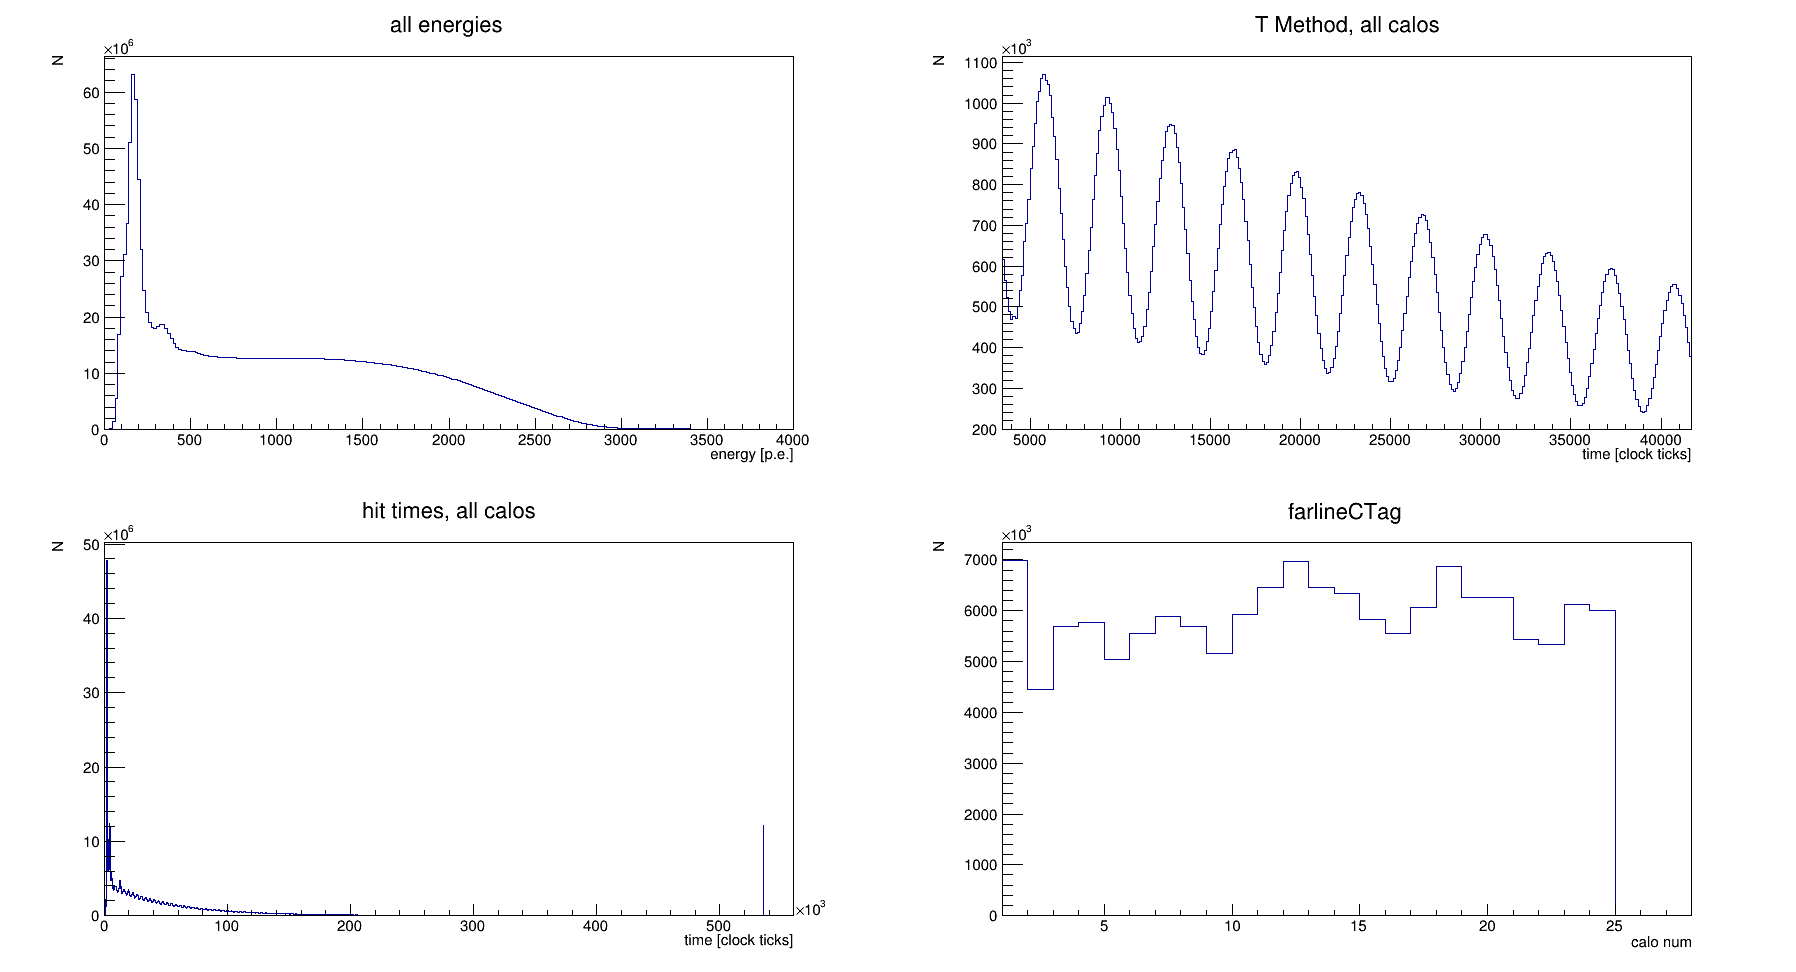

In [6]:
c = r.TCanvas("c","c",1800,1000)
c.Divide(2,2)
c.cd(1)
allCaloEnergies = f.Get("farline").Get("allCaloEnergies").Clone()
allCaloEnergies.Draw()
c.Draw()

c.cd(2)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()
allCaloWiggle.Draw()
allCaloWiggle.GetXaxis().SetRange(30,350)

c.cd(3)
allCaloTimes = f.Get("farline").Get("allCaloTimes").Clone()
allCaloTimes.Draw()

c.cd(4)
farlineCtag = f.Get("farline").Get("farlineCTag").Clone()
farlineCtag.Draw()

c.Draw()
c.Print("./images/"+prodString+"_farlineHistograms.png")

print("{:,}".format(int(allCaloEnergies.GetEntries())), "Entries in these histograms")

In [7]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [8]:
func = r.TF1("func", blinded_wiggle, 30,350,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
#func.SetParLimits(4,-0.001,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(1000)

0.0 560000.0
0.0 700.0
 FCN=3428.34 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS        1456 TOTAL
                     EDM=7.23749e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            8.66931e+05   1.06326e+02  -2.45224e-02  -1.85163e-10
   2  #tau         6.43269e+01   4.64565e-03   6.12086e-07   2.35189e-05
   3  A           -4.11492e-01   8.62998e-05   4.95410e-08  -6.14609e-05
   4  R           -1.13215e+01   2.60200e+00   2.80108e-04   5.33342e-08
   5  #phi         2.09311e+01   4.07756e-04   4.07756e-04  -1.00600e-04


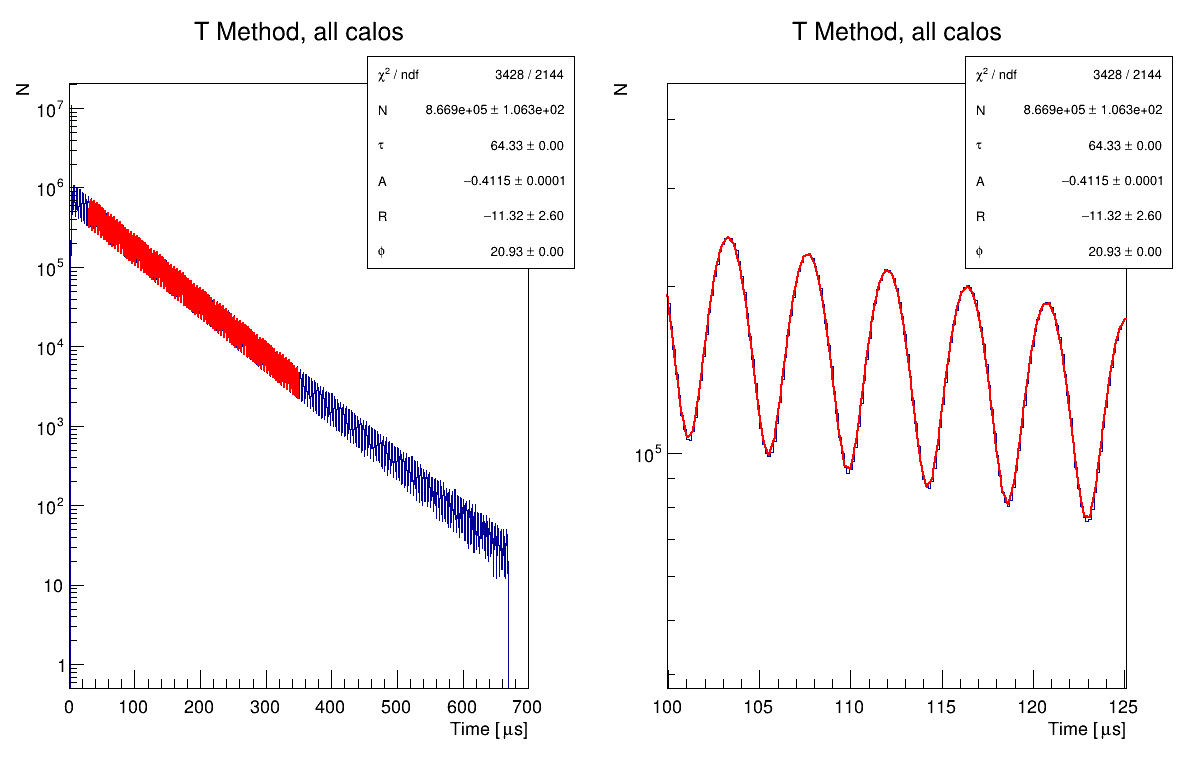

In [9]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle = f.Get("farline").Get("allCaloWiggle").Clone()

print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

allCaloWiggle.Fit("func","REM")

allCaloWiggle.Draw()

c2.cd(2)
ding =  allCaloWiggle.Clone()
ding.GetXaxis().SetRangeUser(100,125)
ding.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_05_00_TmethodWiggleFitAllCalos.png has been created


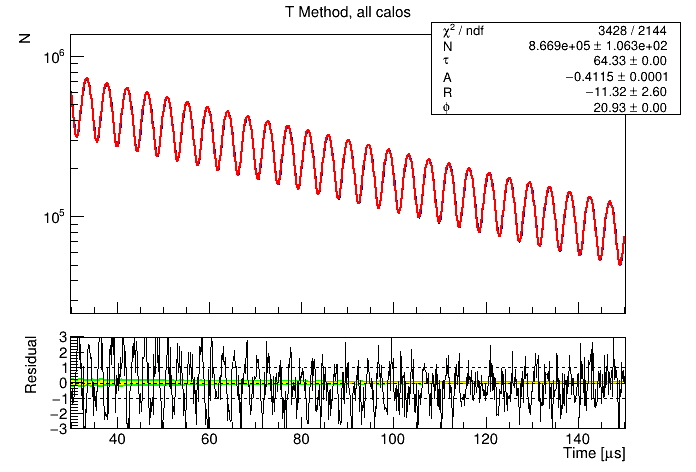

In [10]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,150)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"_TmethodWiggleFitAllCalos.png")

Fourier transform of the 5-parameter residuals.

4700
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Info in <TCanvas::Print>: png file ./images/v9_05_00_5ParamResiduals.png has been created


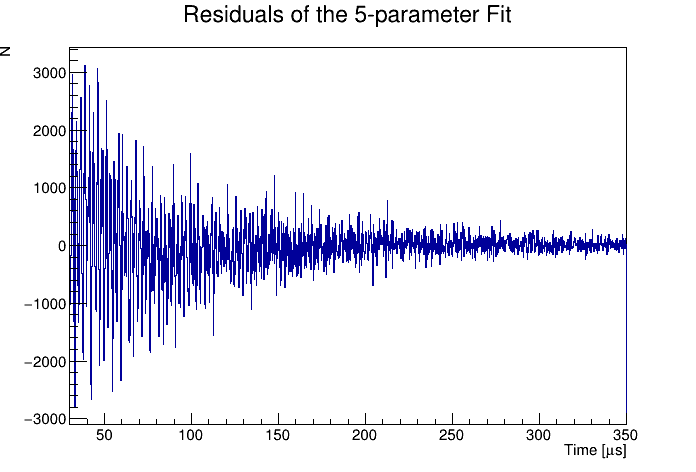

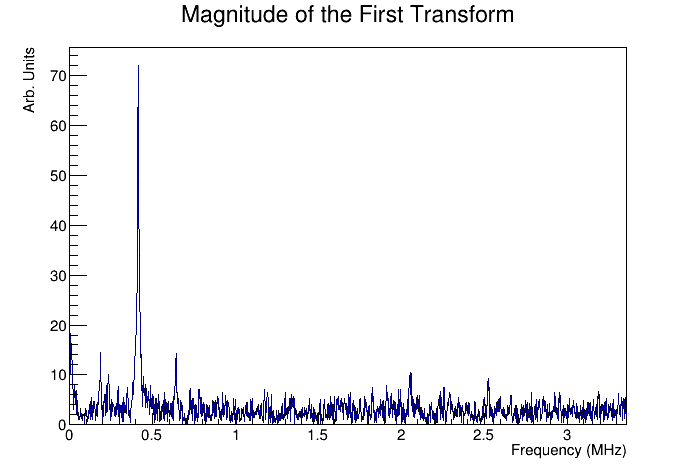

In [11]:
c3 = r.TCanvas()
residuals5param = residuals.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals5param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
for i in range(nBins):
    binCenterX = allCaloWiggle.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residuals5param.SetBinContent(i, allCaloWiggle.GetBinContent(i) - func.Eval(binCenterX))
    else:
        residuals5param.SetBinContent(i, 0)

residuals5param.Draw()
residuals5param.GetXaxis().SetRangeUser(30,350)
residuals5param.SetTitle("Residuals of the 5-parameter Fit")
c3.Draw()
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals5param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (5-Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals5param.GetSize() - 2
minBinCenter = residuals5param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals5param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
#hxform.GetXaxis().SetLimits(0,limmax)
nbins = residuals5param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

residuals5paramXform = hxform.Clone()

c2.Draw()
c2.Print("./images/"+prodString+"_5ParamResiduals.png")

Now lets make some plots from the individual calorimeters.

Starting Calo 1
Starting Calo 2
Starting Calo 3
Starting Calo 4
Starting Calo 5
Starting Calo 6
Starting Calo 7
Starting Calo 8
Starting Calo 9
Starting Calo 10
Starting Calo 11
Starting Calo 12
Starting Calo 13
Starting Calo 14
Starting Calo 15
Starting Calo 16
Starting Calo 17
Starting Calo 18
Starting Calo 19
Starting Calo 20
Starting Calo 21
Starting Calo 22
Starting Calo 23
Starting Calo 24
 FCN=3443.41 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         572 TOTAL
                     EDM=1.00691e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.25873e+04   2.63276e+01  -2.40573e-03  -4.12774e-09
   2  #tau         6.43756e+01   2.22935e-02  -1.56988e-06   9.80792e-07
   3  A           -4.06719e-01   4.13655e-04   1.93950e-07  -8.40095e-06
   4  R           -2.29349e+01   1.27564e+01   2.89195e-05  -3.93471e-08
   5  #p

Info in <TCanvas::Print>: png file ./images/v9_05_00_calo01_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo02_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo03_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo04_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo05_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9_05_00_calo06_FullSet.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Info in <TCanvas::Print>: png file ./images/v9

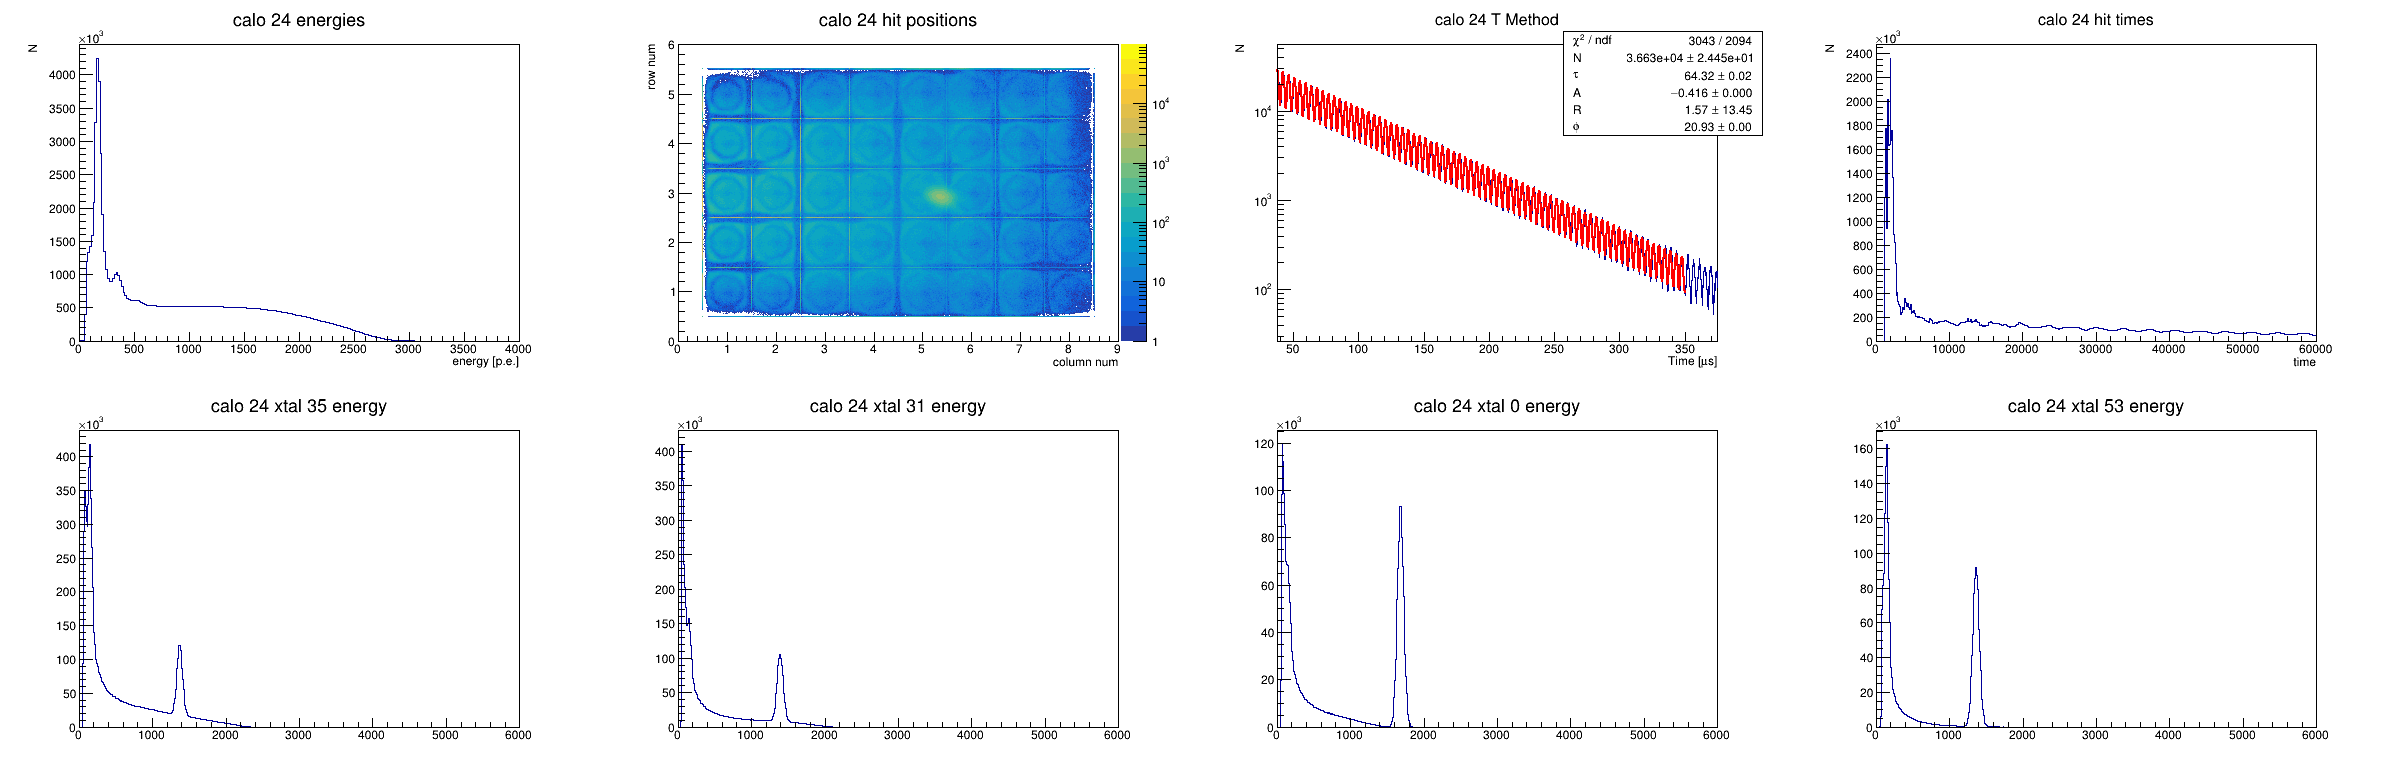

In [12]:
caloNum = 1

wiggleFitParamVec = []

for caloNum in range(1,25):
    print("Starting Calo", caloNum)
    
    c4 = r.TCanvas("c4","c4",2400,800)
    c4.Divide(4,2)

    c4.cd(1)
    caloiEnergy = f.Get("farline").Get("calo"+str(caloNum)).Get("energy").Clone()
    caloiEnergy.Draw()
    c4.Draw()

    c4.cd(2)
    caloiXtalHits = f.Get("farline").Get("calo"+str(caloNum)).Get("hitPositions").Clone()
    caloiXtalHits.Draw("colz")
    r.gPad.SetLogz()

    c4.cd(3)
    caloiWiggle = f.Get("farline").Get("calo"+str(caloNum)).Get("wiggle").Clone()
    caloiWiggle.GetXaxis().SetRangeUser(30000,300000)
    caloiWiggle.Draw()
    r.gPad.SetLogy()

    caloiWiggle.GetXaxis().SetLimits(caloiWiggle.GetXaxis().GetXmin() / 1000 * 1.25,caloiWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    caloiWiggle.GetXaxis().SetTitle("Time [#mus]")
    
    caloiWiggle.Fit("func","REM")
    
    wiggleFitParamVec.append( ( func.GetParameter(3) , func.GetParError(3) ) )

    c4.cd(4)
    caloiTimes = f.Get("farline").Get("calo"+str(caloNum)).Get("times").Clone()
    caloiTimes.GetXaxis().SetRangeUser(0,60000)
    caloiTimes.Draw()

    c4.cd(5)
    caloiXtal35Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal35Energy").Clone()
    caloiXtal35Energy.Draw()

    c4.cd(6)
    caloiXtal31Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal31Energy").Clone()
    caloiXtal31Energy.Draw()

    c4.cd(7)
    caloiXtal0Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal0Energy").Clone()
    caloiXtal0Energy.Draw()

    c4.cd(8)
    caloiXtal53Energy = f.Get("farline").Get("calo"+str(caloNum)).Get("xtal53Energy").Clone()
    caloiXtal53Energy.Draw()

    c4.Draw()
    c4.Print("./images/"+prodString+"_calo"+str(caloNum).zfill(2)+"_FullSet.png")

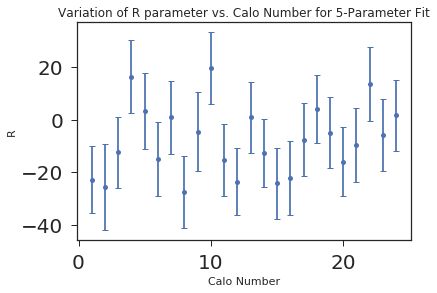

In [13]:
pars, parErrs = zip(*wiggleFitParamVec)
calos = [x for x in range(1,25)]
plt.errorbar(x=calos,y=pars,yerr=parErrs,ls='none',capsize=3,capthick=1,marker='o',markersize=5)
plt.title("Variation of R parameter vs. Calo Number for 5-Parameter Fit")
plt.xlabel("Calo Number")
plt.ylabel("R")
plt.show()

This is some pretty appalling variation in the R value, but lets add some more parameters in and see what happens

In [14]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO2))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO3)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [15]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,350,13)
func13.SetParNames('N','#tau','A','R','#phi','A_{1}','A_{2}','A_{3}','#tau_{CBO}','#omega_{CBO}','#phi_{CBO - 1}')
func13.SetParName(11,'#phi_{CBO - 2}')
func13.SetParName(12,'#phi_{CBO - 3}')
func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
func13.SetParLimits(8,0.000000001,10000) #Avoid divide by 0 error
func13.SetParLimits(10,-6.3,6.3) 
func13.SetParLimits(11,-6.3,6.3)
func13.SetParLimits(12,-6.3,6.3)

#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(866930.9573839636, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -35.666502391530784, 
                     977.6927259503578, -302.38908021438317, 1.4096492214822265, 
                     3.7638326678749663, 0.4745581246420292)
func13.SetParameter(11, 6.299934663288357)
func13.SetParameter(12, 0.28579778778899545)


func13.SetLineColor(2)
func13.SetNpx(1000)

 FCN=2437.15 FROM MINOS     STATUS=SUCCESSFUL    607 CALLS        6720 TOTAL
                     EDM=3.47757e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            8.66979e+05   1.06363e+02  -3.90381e-03   3.34568e-09
   2  #tau         6.43254e+01   4.64630e-03   1.69133e-07   8.78046e-06
   3  A           -4.11508e-01   8.63140e-05  -2.75198e-09   3.30816e-03
   4  R           -8.81893e+00   2.60456e+00  -2.82119e-04  -4.13354e-08
   5  #phi        -4.20218e+00   4.08475e-04   5.91920e-09  -1.07542e-02
   6  A_{1}        8.44775e-04   1.39526e-04   3.18573e-08  -1.80508e-02
   7  A_{2}        9.38503e-03   6.63635e-04  -1.01238e-08  -6.72684e-03
   8  A_{3}       -9.28172e-03   6.64817e-04   7.57586e-08   3.10224e-02
   9  #tau_{CBO}   2.33277e+02   4.15810e+01  -1.10887e-06   2.10860e-03
  10  #omega_{CBO}   4.04006e+00   5.32691

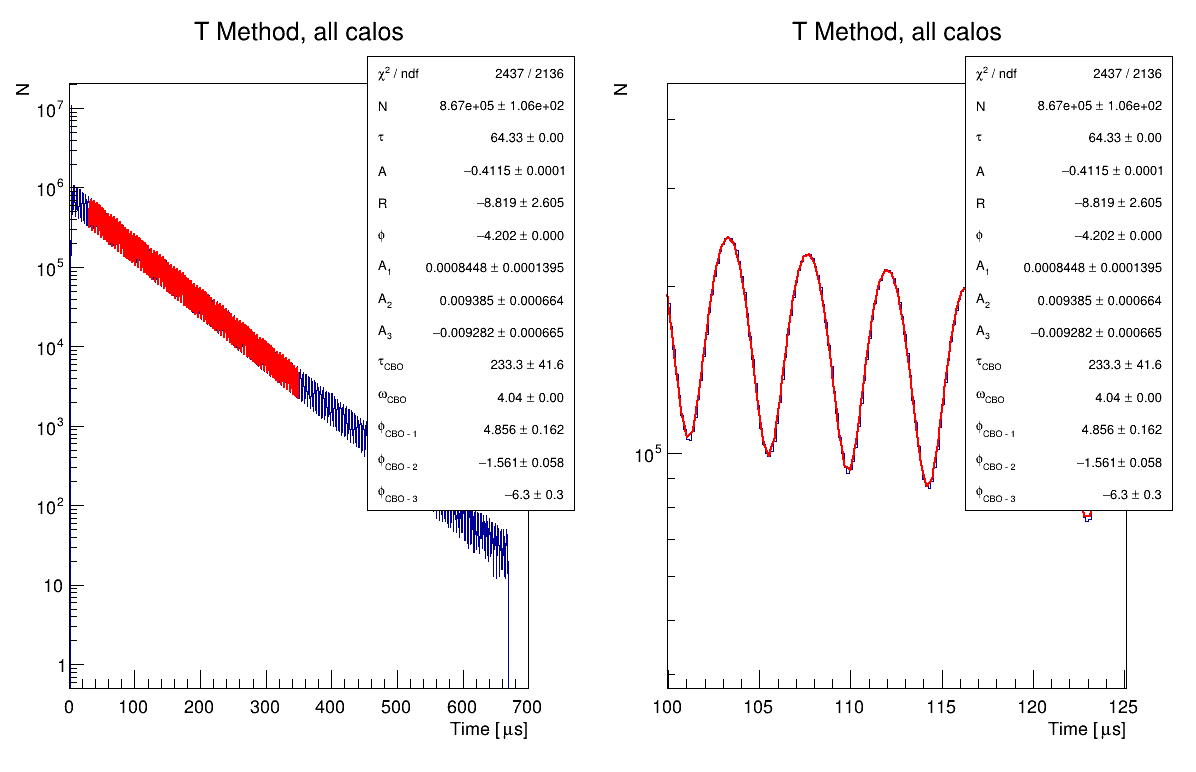

In [22]:
c2 = r.TCanvas("c2","c2",1200,800)
c2.Divide(2,1)
c2.cd(1)
r.gPad.SetLogy()

r.gStyle.SetOptFit(111)
allCaloWiggle13 = f.Get("farline").Get("allCaloWiggle").Clone()

allCaloWiggle13.GetXaxis().SetLimits(allCaloWiggle13.GetXaxis().GetXmin() / 1000 * 1.25,
                                     allCaloWiggle13.GetXaxis().GetXmax() / 1000 * 1.25)
allCaloWiggle13.GetXaxis().SetTitle("Time [#mus]")

residuals13 = allCaloWiggle13.Clone() # this will be filled with the fit residuals later

allCaloWiggle13.Fit("func13","REM")

allCaloWiggle13.Draw()

c2.cd(2)
ding13 =  allCaloWiggle13.Clone()
ding13.GetXaxis().SetRangeUser(100,125)
ding13.Draw()

r.gPad.SetLogy()
c2.Draw()

Info in <TCanvas::Print>: png file ./images/v9_05_00_TmethodWiggleFitAllCalos_13Parameter.png has been created


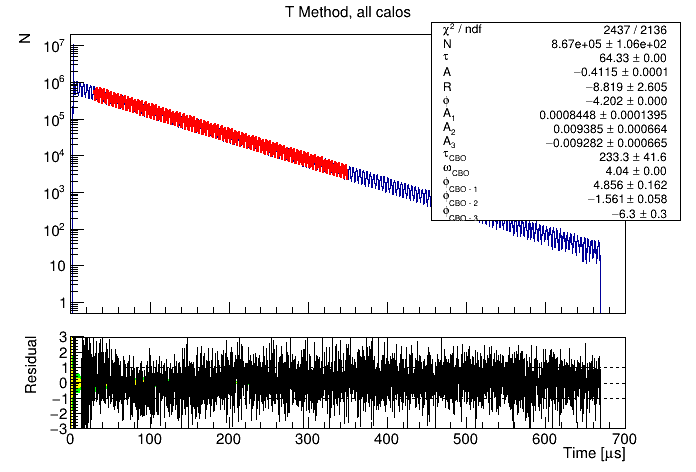

In [23]:
#The class calculates the  difference between the histogram and the fit function at each point 
#    and divides it by the uncertainty.
c3 = r.TCanvas()
allCaloWiggle13.Draw()
c3.SetLogy()
c3.Draw()

rp1 = r.TRatioPlot(allCaloWiggle13)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("Residual")
rp1.GetLowerRefYaxis().SetRangeUser(-3,3)

allCaloWiggle.GetXaxis().SetRangeUser(30,150)

c3.Update()
c3.Draw()
c3.Print("./images/"+prodString+"_TmethodWiggleFitAllCalos_13Parameter.png")

4700
4700 699.9999999999999 -0.07446808510638298 699.9255319148936
0.14893617021276592 0.0014285714285714288
13.42857142857143 6.714285714285715


Warning in <TDirectoryFile::Append>: Replacing existing TH1: out_MAG P (Potential memory leak).
Info in <TCanvas::Print>: png file ./images/v9_05_00_13ParamResiduals.png has been created


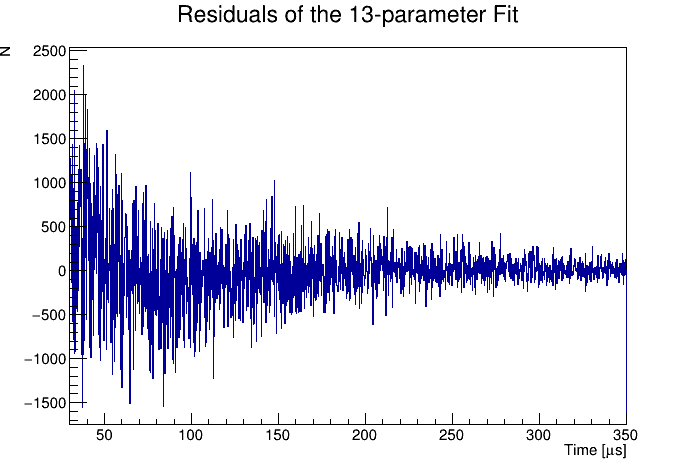

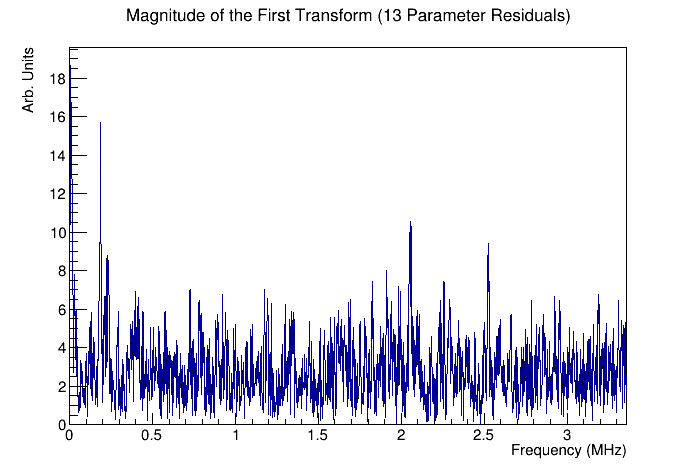

In [24]:
c3 = r.TCanvas()
residuals13param = residuals13.Clone() # this will hold the residials from the 5-parameter fit
nBins = residuals13param.GetSize() - 2 #total number of bins excluding over/underflow
print(nBins)
for i in range(nBins):
    binCenterX = allCaloWiggle13.GetXaxis().GetBinCenter(i)
    if (binCenterX > 30):
        residuals13param.SetBinContent(i, allCaloWiggle13.GetBinContent(i) - func13.Eval(binCenterX))
    else:
        residuals13param.SetBinContent(i, 0)

residuals13param.Draw()
residuals13param.GetXaxis().SetRangeUser(30,350)
residuals13param.SetTitle("Residuals of the 13-parameter Fit")
c3.Draw()
    
hxform = r.TH1D()
hxform = 0
r.TVirtualFFT.SetTransform(0)
hxform = residuals13param.FFT(hxform,"MAG P")
hxform.SetTitle("Magnitude of the First Transform (13 Parameter Residuals)")
#NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
#    y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
normXform = hxform.GetEntries()
hxform.Scale(1/normXform)
c2 = r.TCanvas()
c2.cd()
#c2.SetLogy()
hxform.GetXaxis().SetTitle("Frequency (MHz)")
hxform.GetYaxis().SetTitle("Arb. Units")
hxform.Draw("HIST P0 L")
c2.Draw()

Npart = residuals13param.GetSize() - 2
minBinCenter = residuals13param.GetXaxis().GetBinCenter(0)
maxBinCenter = residuals13param.GetXaxis().GetBinCenter(Npart)

capT = maxBinCenter - minBinCenter
print(Npart, capT, minBinCenter, maxBinCenter)
deltaT = capT/Npart #microseconds
deltaF = 1/capT
print(deltaT, deltaF)

deltaTns = deltaT*1000 #nanoseconds
limmaxHz = (1/(deltaTns*math.pow(10.0,-9)))
limmaxMHz = limmaxHz / math.pow(10,6)

limmax = 2*deltaF*Npart #400-25
print(limmax,limmaxMHz)
nbins = residuals13param.GetSize() - 2
hxform.SetBins(Npart,0,limmaxMHz)
hxform.GetXaxis().SetRangeUser(0,limmaxMHz/2)

c2.Draw()
c2.Print("./images/"+prodString+"_13ParamResiduals.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file ./images/v9_05_00_ResidualComparison5_13.png has been created


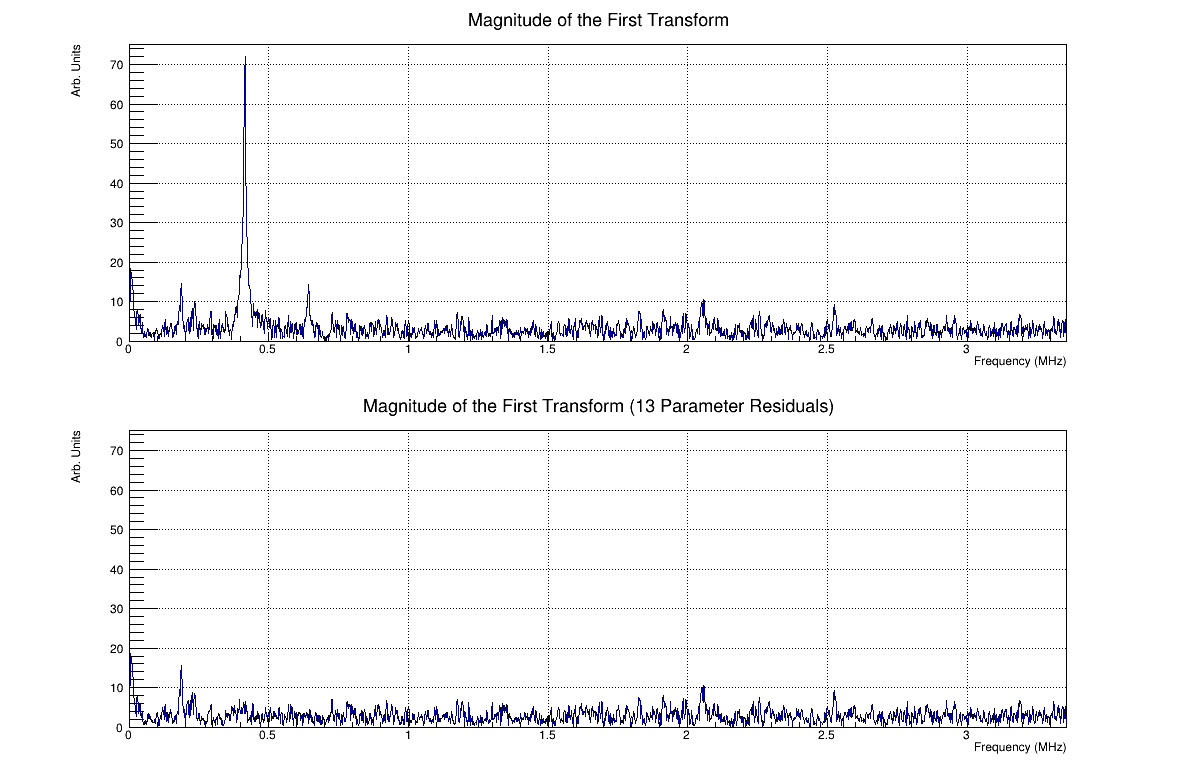

In [34]:
c5 = r.TCanvas("c5","c5",1200,800)
c5.Divide(1,2)
c5.cd(1)
#r.gPad.SetLogy()
r.gPad.SetGrid()

residuals5paramXform.Draw("HIST P0 L")
residuals5paramXform.GetYaxis().SetRangeUser(0,75)
c5.cd(2)
#r.gPad.SetLogy()
r.gPad.SetGrid()
hxform.Draw("HIST P0 L")
hxform.GetYaxis().SetRangeUser(0,75)

c5.Draw()
c2.Print("./images/"+prodString+"_ResidualComparison5_13.png")

In [20]:
parameters13 = []
for i in range(13):
    parameters13.append( (func13.GetParameter(i) , func13.GetParError(i)) )
print(parameters13)
par13,parErr13 = zip(*parameters13)
print(par13)

[(867021.3931644055, 103.4078557583318), (64.32319196535673, 0.00454814866521043), (-0.4115651907394018, 8.796560604435348e-05), (-8.800184207888867, 2.488207684123699), (-4.202209394748008, 0.00038900365666050263), (0.03956263375068646, 0.010065900361709517), (0.33607443803228987, 0.03992238959067573), (-0.22905049502311745, 0.03549418115455111), (9.791083980953228, 0.17715793955956283), (4.0137672277891, 0.0038056319177045233), (-6.278661504749238, 0.05731697044757844), (-0.4220762206477735, 0.14912129442077626), (-5.2487188990589795, 0.16513317809165073)]
(867021.3931644055, 64.32319196535673, -0.4115651907394018, -8.800184207888867, -4.202209394748008, 0.03956263375068646, 0.33607443803228987, -0.22905049502311745, 9.791083980953228, 4.0137672277891, -6.278661504749238, -0.4220762206477735, -5.2487188990589795)


If the eventTree exists (and we haven't deleted it to save space) then we can make plots of the energy/hit distribution in the file. These plots will eventually be replaced by dedicated versions in the CaloFarlineHistograms module.

In [21]:
try:
    t = f.Get("farline").Get("eventTree")
    t.Print()
    
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("y:x","caloNum=="+str(i),"colz")
        c3.Draw()
        c3.Print("./images/hitDistribution_calo"+str(i).zfill(2)+".png")
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("energy","caloNum=="+str(i)+" && energy < 6000","")
        c3.Draw()
        c3.Print("./images/energyByCalo_calo"+str(i).zfill(2)+".png")
    for i in range(1,25):    
        c3 = r.TCanvas()
        t.Draw("ctag","caloNum=="+str(i),"")
        c3.Draw()
        c3.Print("./images/ctag_calo"+str(i).zfill(2)+".png")
    
except:
    print("ERROR: eventTree not found. Likely using results_histOnly.root")

ERROR: eventTree not found. Likely using results_histOnly.root
